<a href="https://colab.research.google.com/github/ahmed146235/Deep_Learning_Models/blob/main/Reading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#data path

trainpath = '/content/drive/MyDrive/Datasets/data/seg_train/'
testpath = '/content/drive/MyDrive/Datasets/data/seg_test/'
Valpath = '/content/drive/MyDrive/Datasets/data/seg_pred/'

In [5]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0    mountain                   2512
1     glacier                   2404
2      forest                   2271
3      street                   2382
4   buildings                   2191
5         sea                   2274


# Training Data

In [6]:
#loading data and resize it and collect it in one folder ====> train
new_size=224    
X_train = []
y_train = []
for folder in os.listdir(trainpath):
    print('foder name is ',folder)
    image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4,'street':5 }
    files=gb.glob(pathname=str(trainpath+folder+'/*jpg'))
    print('Number of image in folder is ',len(files))
    # Reading images in each folder one by one and resize 
    for file in files:
        # loading image
        orignal_image=cv2.imread(file)
        image=cv2.cvtColor(orignal_image,cv2.COLOR_BGR2RGB)
        # resize images 
        resize_image=cv2.resize(image,(new_size,new_size))
        X_train.append(resize_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------') 
#check items in X_train and y_train
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

foder name is  mountain
Number of image in folder is  2512
image reading ...finished
foder name is  glacier
Number of image in folder is  2404
image reading ...finished
foder name is  forest
Number of image in folder is  2271
image reading ...finished
foder name is  street
Number of image in folder is  2382
image reading ...finished
foder name is  buildings
Number of image in folder is  2191
image reading ...finished
foder name is  sea
Number of image in folder is  2274
image reading ...finished
--------------------------------------------------
items in X_train is:        14034  items
items in y_train is:        14034  items


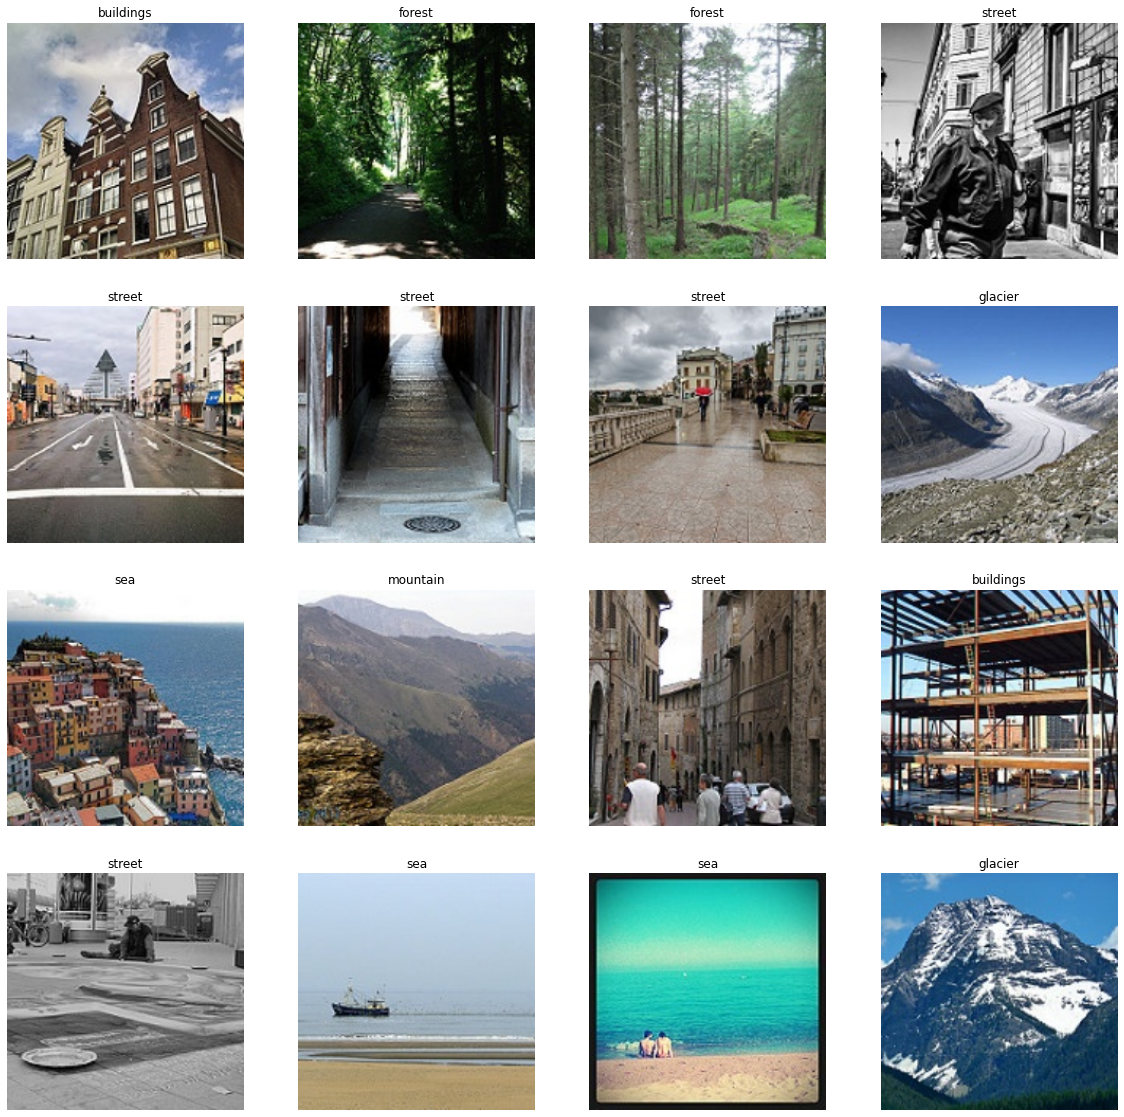

In [7]:
#showing training images with labels
plt.figure(figsize=(20,20))
for index,i in enumerate(list(np.random.randint(0,len(X_train ),16))):
    plt.subplot(4,4,index+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    #labaling 
    image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4,'street':5 }
    def ImageClass(n):
        for key,value in image_class.items():
            if n==value:
                return key
    plt.title(ImageClass(y_train[i]))
    

# Testing Data

In [8]:
#loading data and resize it and collect it in one folder ====> test
new_size=224    
X_test = []
y_test = []
for folder in os.listdir(testpath):
    print('Foder name is ',folder)
    image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4,'street':5 }
    files=gb.glob(pathname=str(testpath+folder+'/*jpg'))
    print('Number of image in the folder is ',len(files))
    # Reading images in each folder one by one and resize 
    for file in files:
        orignal_image=cv2.imread(file)
        image=cv2.cvtColor(orignal_image,cv2.COLOR_BGR2RGB)
        # resize 
        resize_image=cv2.resize(image,(new_size,new_size))
        
        X_test.append(resize_image)
        y_test.append(image_class[folder])
    print('Finishing Reading....')


#check items in X_test and y_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 
        

    

Foder name is  street
Number of image in the folder is  501
Finishing Reading....
Foder name is  sea
Number of image in the folder is  510
Finishing Reading....
Foder name is  mountain
Number of image in the folder is  525
Finishing Reading....
Foder name is  forest
Number of image in the folder is  474
Finishing Reading....
Foder name is  glacier
Number of image in the folder is  553
Finishing Reading....
Foder name is  buildings
Number of image in the folder is  437
Finishing Reading....
items in X_test is:        3000  items
items in y_test is:        3000  items


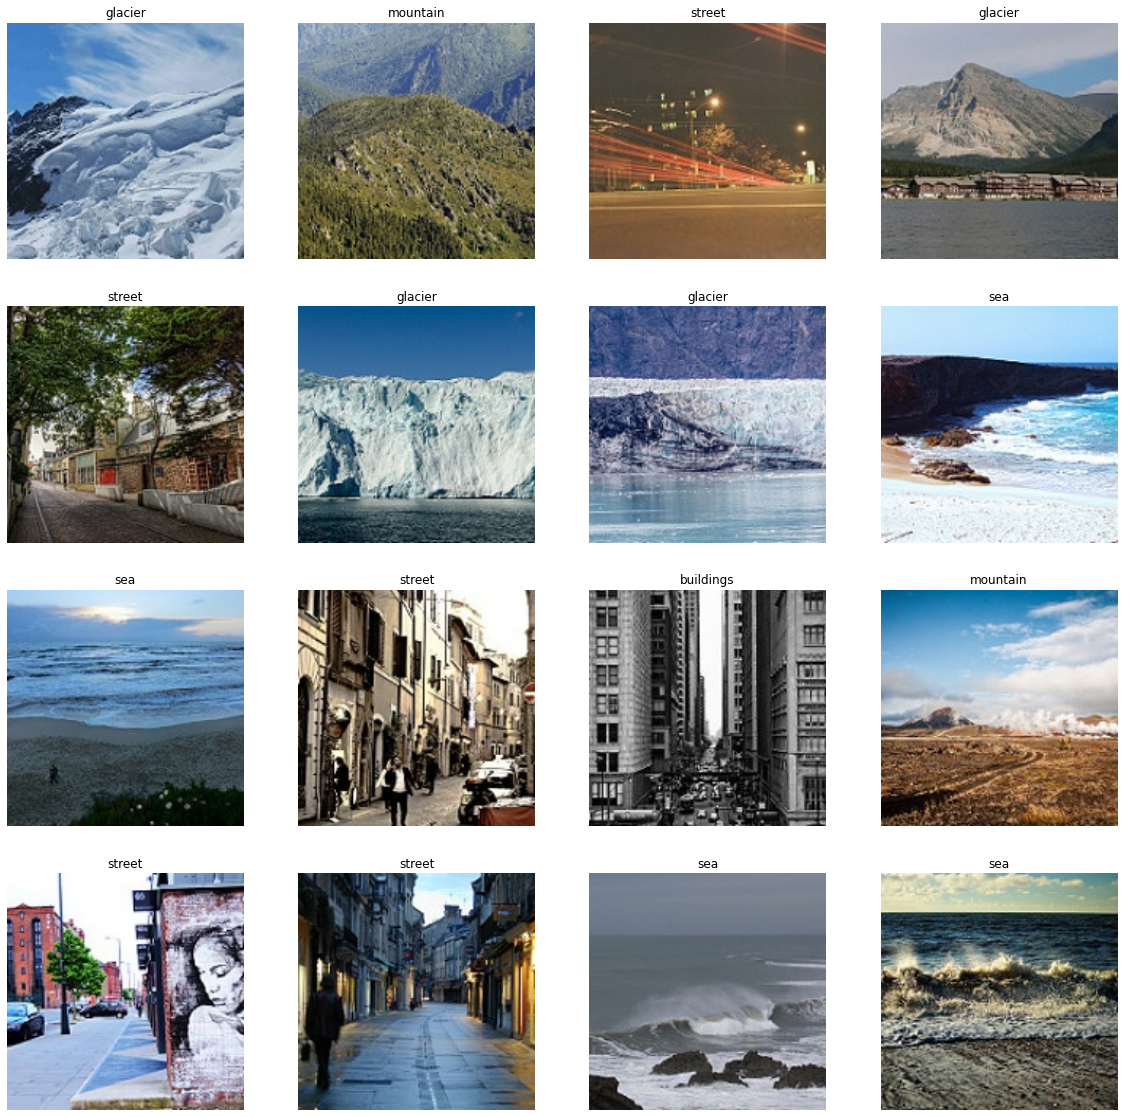

In [9]:
#showing training images with labels
plt.figure(figsize=(20,20))
for index,i in enumerate(list(np.random.randint(0,len(X_test),16))):
    plt.subplot(4,4,index+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    #labaling 
    image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4,'street':5 }
    def ImageClass(n):
        for key,value in image_class.items():
            if n==value:
                return key
    plt.title(ImageClass(y_test[i]))

# Validation Data 

 One Folder of Imades 

In [10]:
X_pred = []
new_size=244
print('Reading the predict data')
files = gb.glob(pathname= str(Valpath + 'seg_pred/*.jpg'))

for file in files: 
    image = cv2.imread(file)
    image_resize = cv2.resize(image , (new_size,new_size))
    X_pred.append(list(image_resize)) 

print('Finishing Reading....')


#check items in pred data 
print("items in prediction is: ",len(X_pred) , " items") 

    

Reading the predict data
Finishing Reading....
items in prediction is:  7311  items


In [11]:
# convert all train data to array 
X_train=np.array(X_train)
y_train=np.array(y_train)
print('X_train shape : ',X_train.shape)

print('y_train shape : ',y_train.shape)

X_train shape :  (14034, 224, 224, 3)
y_train shape :  (14034,)


In [12]:
# convert all test data to array 
X_test=np.array(X_test)
y_test=np.array(y_test)
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)

X_test shape :  (3000, 224, 224, 3)
y_test shape :  (3000,)


In [13]:
# convert all predict data to array 
X_pred=np.array(X_pred) 
print('X_pred shape : ',X_pred.shape)


X_pred shape :  (7311, 244, 244, 3)


In [14]:
# Categorical 
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,6)
y_test=to_categorical(y_test,6)


In [15]:
# Shuffle data 
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
X_test,y_test=shuffle(X_test,y_test)
X_pred=shuffle(X_pred)

# pre processing of images

1- laod data

2- identify paths 

3- read data  (feature and labels)

4- convert into array 

5- Categorical

6- shuffle

7- normalization 

====================

8- building the model 

9- training 

10- evaluating 

# Building Model 

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [17]:
model= Sequential([
    
    Conv2D(16,3,padding='same',activation = "relu",input_shape=(224, 224, 3)),
    MaxPooling2D(2),
    Conv2D(32,3,padding='same',activation = "relu"),
    MaxPooling2D(2),
    Conv2D(64,3,padding='same',activation = "relu"),
    MaxPooling2D(2),
    Flatten(),
    Dense(512,activation = "relu"),
    Dropout(0.3),
    Dense(5, activation='softmax')
    
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

# Compliling model


In [19]:
opt=tf.keras.optimizers.Adam(0.0001)    # for select the learning rate 
model.compile(optimizer=opt,loss='categorical_crossentropy' , metrics='accuracy')

# Fitting Model

In [ ]:
history = model.fit(X_train, y_train, epochs=10)